# 1. Support Vector Machine

# 2. Self of programming

## Hard Margin

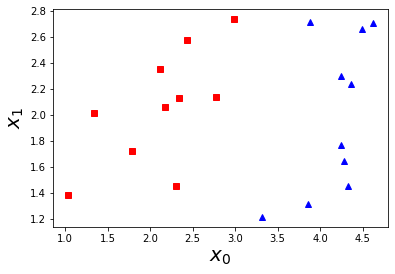

In [16]:
import numpy as np 
import matplotlib.pyplot as plt

np.random.seed(42)

means = [[2, 2], [4, 2]]
cov = [[0.3, 0.2], [0.2, 0.3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N) # class 1 R^10x2
X1 = np.random.multivariate_normal(means[1], cov, N) # class -1 
X = np.concatenate((X0.T, X1.T), axis = 1) # all data # R^2x20
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1) # labels R^1x20 10 số đầu là 1 và 10 số sau là -1
plt.plot(X0[:,0],X0[:,1],"rs")
plt.plot(X1[:,0],X1[:,1],"b^")
plt.xlabel("$x_0$",fontsize=20)
plt.ylabel("$x_1$",fontsize=20)
plt.show()

In [17]:
""" 
    Hàm mục tiêu: 1/2*x^T*P*x+q^T*x= 1/2||x||
    Ràng buộc:    1-yn(w^T*x+b) <= 0
                 V=[x1y1,x2y2,...,xnyn]
""" 
from cvxopt import matrix, solvers
V = np.concatenate((X0.T, -X1.T), axis = 1)# R^2x20
#K=V^T*V=P Ma trận K là ma trận toàn phương
K = matrix(V.T.dot(V)) # R^20x20
#Ma trận hệ số của q^T 
p = matrix(-np.ones((2*N, 1))) # R^20x1
# Tạo ma trận đơn vị R^20x20
#Gx<=h
G = matrix(-np.eye(2*N)) # for all lambda_n >= 0
#Tạo ma trận 0 R^20x1
h = matrix(np.zeros((2*N, 1))) 
#Ax=b điều kiện KTT
A = matrix(y) # R^1x20
b = matrix(np.zeros((1, 1))) #R^1x1
solvers.options['show_progress'] = False
sol = solvers.qp(K, p, G, h, A, b)

l = np.array(sol['x'])
print('lambda = ')
print(l.T)


lambda = 
[[8.02142046e-10 2.07333700e-09 1.34580085e-09 1.99339351e-09
  1.26140452e-09 2.91207988e-09 1.57928804e-08 1.99019311e-07
  2.42135293e-09 2.83906384e+00 1.65757169e+00 1.55311561e-09
  2.21241617e-09 1.22625284e-09 1.41030567e-09 1.18149236e+00
  1.58860421e-09 3.03662189e-09 1.64406082e-09 9.12681045e-10]]


w =  [[-2.22765777  0.84597327]]
b =  5.3613255312069175


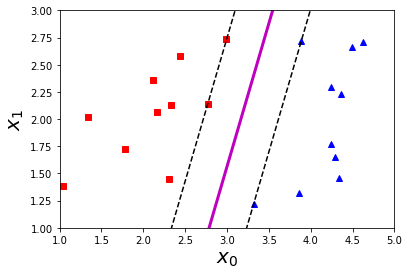

In [18]:
tol = 1e-6 # just a small number, greater than 1e-9
#Tập S chứa vector support là lambda khác 0
loc_S = np.where(l > tol)[0] # Tìm vị trí của tập S
# Lấy ma trận V,X,y, lambda những vị trí của tập S
V_S = V[:, loc_S]
X_S = X[:, loc_S]
y_S = y[:, loc_S]
Lambda_S = l[loc_S]
# Tính toán w và b
w = V_S.dot(Lambda_S)
b = np.mean(y_S.T - w.T.dot(X_S))

print('w = ', w.T)
print('b = ', b)

x=np.linspace(-1,14,100)
y1=-w[0]*x/w[1]-b/w[1]
#Vẽ 2 đường support y=1 và y=-1
y2=-w[0]*x/w[1]-(b+1)/w[1]
y3=-w[0]*x/w[1]-(b-1)/w[1]

plt.plot(X0[:,0],X0[:,1],"rs")
plt.plot(X1[:,0],X1[:,1],"b^")
plt.xlabel("$x_0$",fontsize=20)
plt.ylabel("$x_1$",fontsize=20)
plt.plot(x,y1,"m",linewidth=3)
plt.plot(x,y2,"k--")
plt.plot(x,y3,"k--")
plt.axis([1,5,1,3])
plt.show()

In [19]:
#Giải Hard SVM bằng Scikit learn
from sklearn.svm import SVC

y1 = y.reshape((2*N,))
X1 = X.T 

clf = SVC(kernel = 'linear', C = 1e5) # just a big number 
clf.fit(X1, y1) 

w = clf.coef_
b = clf.intercept_
print('w = ', w)
print('b = ', b)


w =  [[-2.22771703  0.84609359]]
b =  [5.36127952]


## Soft Margin

Text(0, 0.5, '$x_2$')

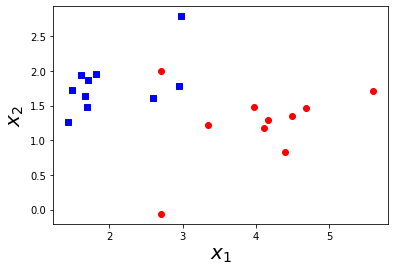

In [20]:
# Soft SVM
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(92)

means = [[2, 2], [4, 1]]
cov = [[0.3, 0.2], [0.2, 0.3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X1[-1, :] = [2.7, 2]#cho hàng cuối bằng 2 giá trị là ngoại lai
X = np.concatenate((X0.T, X1.T), axis = 1)#R^2x20
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)#R^1x20
plt.plot(X0[:,0],X0[:,1],'bs',alpha=1)
plt.plot(X1[:,0],X1[:,1],'ro',alpha=1)
plt.xlabel("$x_1$",fontsize=20)
plt.ylabel("$x_2$",fontsize=20)

In [21]:
X = np.vstack((X0, X1))# R^20x2
y = np.vstack((np.ones((N,1 )), -np.ones((N,1 )))).reshape((2*N,))

In [22]:
"""Giải bài toán bằng đối ngẫu langrage
   Hàm mục tiêu:  1/2*x^T*P*x+q^T*x= 1/2||x|| + C*sum(ζ_i)
   Ràng buộc:     1-ζ_i-yn(w^T*x+b) <= 0
"""
from cvxopt import matrix, solvers
# build K
V = np.concatenate((X0.T, -X1.T), axis = 1)
K = matrix(V.T.dot(V))

p = matrix(-np.ones((2*N, 1)))
# build A, b, G, h
#Nối 2 ma trận đơn vị thẳng đứng
G = matrix(np.vstack((-np.eye(2*N), np.eye(2*N))))
C=100

h = matrix(np.vstack((np.zeros((2*N, 1)), C*np.ones((2*N, 1)))))
A = matrix(y.reshape((-1, 2*N))) 
b = matrix(np.zeros((1, 1))) 
solvers.options['show_progress'] = False
sol = solvers.qp(K, p, G, h, A, b)

l = np.array(sol['x'])
#print('lambda = \n', l.T)


[[-2.12912478  1.04929285]] 4.731797191666871


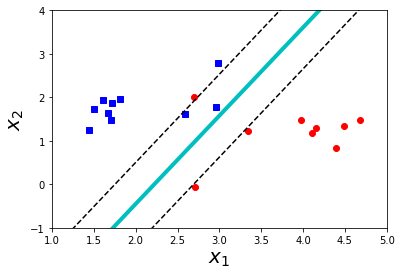

In [23]:
S = np.where(l > 1e-5)[0]
S2 = np.where(l < 0.99*C)[0]
# tập M thõa 0 < lamda< C
M = [val for val in S if val in S2]
# Tìm b dựa vào lambda trong tập S và V trong tập S
 
V_S = V[:, S]
lambda_S = l[S]

#Tìm b dựa vào y trong tập M và x trong tập M
X_T = X.T
y_M = y[M]
X_M = X_T[:, M]
w_dual = V_S.dot(lambda_S).reshape(-1, 1)
b_dual = np.mean(y_M.T - w_dual.T.dot(X_M))
print(w_dual.T, b_dual)

plt.plot(X0[:,0],X0[:,1],'bs',alpha=1)
plt.plot(X1[:,0],X1[:,1],'ro',alpha=1)
plt.xlabel("$x_1$",fontsize=20)
plt.ylabel("$x_2$",fontsize=20)
x1=np.arange(-10,10,0.1)
y1=-w_dual[0]/w_dual[1]*x1-b_dual/w_dual[1]
y2=-w_dual[0]/w_dual[1]*x1-(b_dual-1)/w_dual[1]
y3=-w_dual[0]/w_dual[1]*x1-(b_dual+1)/w_dual[1]
plt.plot(x1,y1,"c",linewidth=4)
plt.plot(x1,y2,'k--')
plt.plot(x1,y3,'k--')
plt.axis([1 ,5, -1 ,4])
plt.show()

## Hàm hinge loss

In [24]:
#Sử dụng gradient descent của hàm hinge loss

X0_bar = np.vstack((X0.T, np.ones((1, N)))) # extended data
X1_bar = np.vstack((X1.T, np.ones((1, N)))) # extended data 

Z = np.hstack((X0_bar, - X1_bar)) # as in (22)
C=100
lam = 1./C

def cost(w):
    u = w.T.dot(Z) # as in (23)
    return (np.sum(np.maximum(0, 1 - u)) + \
            0.5*lam*np.sum(w*w)) - 0.5*lam*w[-1]*w[-1]

def grad(w):
    u = w.T.dot(Z) # as in (23)
    H = np.where(u < 1)[1]
    ZS = Z[:, H]
    g = (-np.sum(ZS, axis = 1, keepdims = True) + lam*w)#???
    g[-1] -= lam*w[-1]
    return g

eps = 1e-6
#Đạo hàm 2 phương
def num_grad(w):
    g = np.zeros_like(w)
    for i in range(len(w)):
        wp = w.copy()
        wm = w.copy()
        wp[i] += eps 
        wm[i] -= eps 
        g[i] = (cost(wp) - cost(wm))/(2*eps)
    return g 

w0 = np.random.randn(X0_bar.shape[0], 1) 
g1 = grad(w0)
g2 = num_grad(w0)
#Kiểm tra giá trị có giống nhau hông
diff = np.linalg.norm(g1 - g2)
print('Gradient difference: %f' %diff)

Gradient difference: 0.000000


In [25]:
def grad_descent(w0, eta):
    w = w0
    it = 0 
    while it < 100000:
        it = it + 1
        g = grad(w)
        w -= eta*g
        if (it % 10000) == 1:
            print('iter %d' %it + ' cost: %f' %cost(w))
        if np.linalg.norm(g) < 1e-5:
            break 
    return w 
w0 = np.random.randn(X0_bar.shape[0], 1) 
w = grad_descent(w0, 0.001)
w_hinge = w[:-1].reshape(-1, 1)
b_hinge = w[-1]
w_hinge

iter 1 cost: 21.770047
iter 10001 cost: 2.915473
iter 20001 cost: 2.901139
iter 30001 cost: 2.885548
iter 40001 cost: 2.884159
iter 50001 cost: 2.865176
iter 60001 cost: 2.859287
iter 70001 cost: 2.857077
iter 80001 cost: 2.840772
iter 90001 cost: 2.829617


array([[-2.01173031],
       [ 1.28333225]])

In [26]:
from sklearn.svm import SVC
C = 100
clf = SVC(kernel = 'linear', C = 100)
clf.fit(X, y) 

w = clf.coef_.reshape(-1, 1)
b = clf.intercept_[0]
w,b

(array([[-2.12892755],
        [ 1.04922362]]), 4.831714286705087)

In [28]:
print(w_dual.T, b_dual) 
print(w_hinge.T, b_hinge)
print(w.T, b)

[[-2.12912478  1.04929285]] 4.731797191666871
[[-2.01173031  1.28333225]] [4.14103495]
[[-2.12892755  1.04922362]] 4.831714286705087


## Kernel SVM

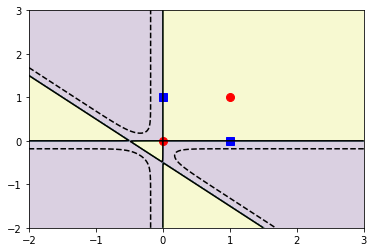

In [5]:
# Kernel SVM với bài toán XOR
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
X = np.c_[(0, 0),(1, 1),(1, 0),(0, 1)].T
Y = [0] * 2 + [1] * 2
clf = svm.SVC(kernel='sigmoid', gamma=4, coef0 = 1)
clf.fit(X, Y)

plt.plot(X[:2, 0], X[:2, 1], 'ro', markersize = 8)
plt.plot(X[2:, 0], X[2:, 1], 'bs', markersize = 8)
x_min = -2
x_max = 3
y_min = -2
y_max = 3
# Tạo 200 số cách đều ở trục j(trục x) từ min đến max giống linspace
# XX R^200x200 và XY cũng R^200x200
XX,YY= np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
# XX.ravel() R^1x40000 200 số -2,...,200 số 3
X_c=np.c_[XX.ravel(), YY.ravel()]
# X_c R^40000x2
Z = clf.decision_function(X_c)
# Z R^200x200
Z = Z.reshape(XX.shape)
Z.shape 
#Hàm xác định dấu chia các miền ra
CS = plt.contourf(XX, YY, np.sign(Z), alpha = .2)
#Vẽ 3 đường: boundary, upper,lower 
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],levels=[-.5, 0, .5])

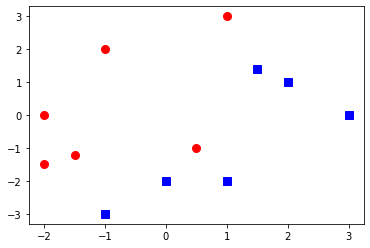

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


X = np.c_[(-1, -3),(0, -2),(1, -2),(2, 1),(3, 0),(1.5, 1.4),(1, 3),(0.5, -1),(-1, 2),(-2, -1.5),(-2, 0),(-1.5, -1.2)].T
N = 6
Y = [0] * N + [1] * N
plt.plot(X[:N, 0], X[:N, 1], 'bs', markersize = 8)
plt.plot(X[N:, 0], X[N:, 1], 'ro', markersize = 8)
plt.show()

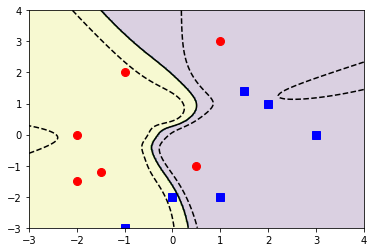

In [30]:
clf = svm.SVC(kernel='sigmoid', gamma=1, coef0 = 1)
clf.fit(X, Y)
x_min = -3
x_max = 4
y_min = -3
y_max = 4
# Tạo 200 số cách đều ở trục j(trục x) từ min đến max giống linspace
# XX R^200x200 và XY cũng R^200x200
XX,YY= np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
# XX.ravel() R^1x40000 200 số -2,...,200 số 3
X_c=np.c_[XX.ravel(), YY.ravel()]
# X_c R^40000x2
Z = clf.decision_function(X_c)
# Z R^200x200
Z = Z.reshape(XX.shape)
Z.shape 
plt.plot(X[:N, 0], X[:N, 1], 'bs', markersize = 8)
plt.plot(X[N:, 0], X[N:, 1], 'ro', markersize = 8)

#Hàm xác định dấu chia các miền ra
CS = plt.contourf(XX, YY, np.sign(Z), alpha = 0.2)
#Vẽ 3 đường: boundary, upper,lower 
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],levels=[-0.5, 0, 0.5])
plt.show()

>**Polynomial SVM** 

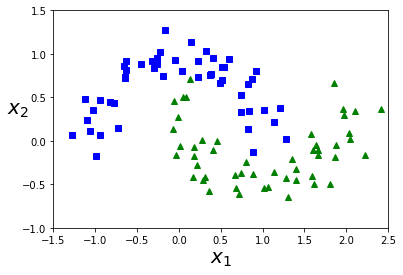

In [75]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
def plot_moon(X):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.xlabel("$x_1$", fontsize=20)
    plt.ylabel("$x_2$", fontsize=20, rotation=0)
    plt.axis([-1.5,2.5,-1,1.5])
    plt.show()
plot_moon(X)

In [86]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# poly=PolynomialFeatures(degree=3)
# X_poly=poly.fit_transform(X)
# svm_clf=LinearSVC(C=3, loss="hinge", random_state=42)
# svm_clf.fit(X_poly,y)???
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

C:\Users\AM\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=3, loss='hinge', random_state=42)

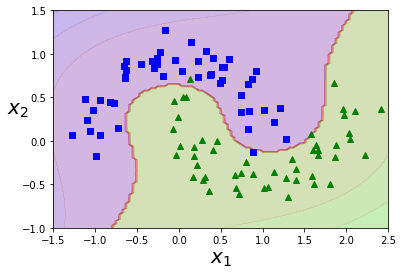

In [97]:
x0s = np.linspace(-1.5, 2.5, 100)
x1s = np.linspace(-1, 1.5, 100)
x0, x1 = np.meshgrid(x0s, x1s)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_pred =polynomial_svm_clf.predict(X_new).reshape(x0.shape)
y_decision = polynomial_svm_clf.decision_function(X_new).reshape(x0.shape)
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
plot_moon(X)